In [1]:
from pylab import *

%matplotlib inline

In [2]:
rcParams['font.size'] = 14

In [3]:
ls

log.cite     msd_370.txt    rdf_330.txt                    tmp_t278.txt
log.lammps   msd_374.txt    rdf_334.txt                    tmp_t282.txt
msd_1.txt    msd_378.txt    rdf_338.txt                    tmp_t286.txt
msd_250.txt  msd_382.txt    rdf_342.txt                    tmp_t290.txt
msd_251.txt  msd_386.txt    rdf_346.txt                    tmp_t294.txt
msd_254.txt  msd_390.txt    rdf_350.txt                    tmp_t298.txt
msd_258.txt  msd_394.txt    rdf_354.txt                    tmp_t302.txt
msd_262.txt  msd_398.txt    rdf_358.txt                    tmp_t306.txt
msd_266.txt  msd_402.txt    rdf_362.txt                    tmp_t310.txt
msd_270.txt  msd_406.txt    rdf_366.txt                    tmp_t314.txt
msd_274.txt  msd_410.txt    rdf_370.txt                    tmp_t318.txt
msd_278.txt  output_ttree/  rdf_374.txt                    tmp_t322.txt
msd_282.txt  rdf_1.txt      rdf_378.txt                    tmp_t326.txt
msd_286.txt  rdf_250.txt    rdf_382.txt                    tmp_t

In [17]:
start = 250
runs = 40
gap = 4 
end = start + runs*gap + 1

sim_range = xrange(start, end, gap)
n_bins = 100

N = len(sim_range) - 1
temp_points_rdf = (start, sim_range[N/2], end - 1)

n_time_steps = 1000
dt = 0.005
tot_time = float(n_time_steps * dt)

D = zeros(len(sim_range))
temps = zeros(len(sim_range))
g = zeros((3, n_bins))
x = zeros(g.shape)

idx = [1, 3]

In [18]:
for i, temp_bath in enumerate(sim_range):
    r_msd = loadtxt("msd_{}.txt".format(temp_bath))[-1, 1]
    temps[i] = loadtxt("tmp_t{}.txt".format(temp_bath))[-1, 1]
    D[i] = r_msd / (6 * tot_time)

for i, temp_bath in enumerate(temp_points_rdf):
    with open("rdf_{}.txt".format(temp_bath)) as infile:
        lines = infile.read().splitlines()
        last_lines = [[float(numb) for numb in line.split(" ")[1:4:2]] for line in lines[-n_bins:]]
        x[i, :], g[i, :] = array([array(line) for line in last_lines]).T
        
sort_idx = argsort(temps)

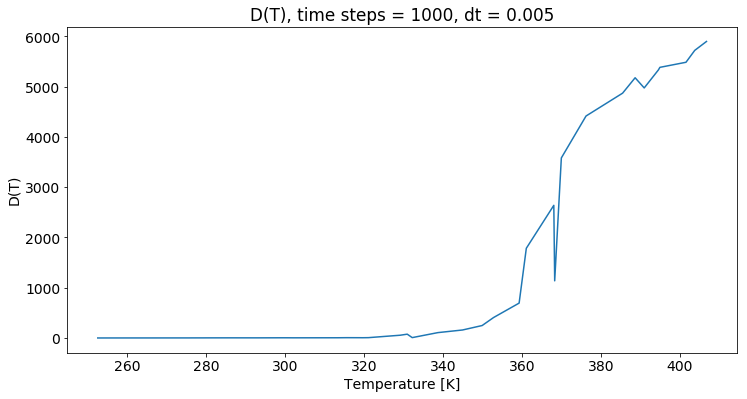

In [19]:
figure(figsize=(12, 6))
title("D(T), time steps = {}, dt = {}".format(n_time_steps, dt))
xlabel("Temperature [K]")
ylabel("D(T)")
plot(temps[sort_idx], D[sort_idx])
show()

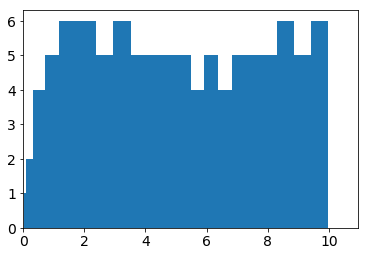

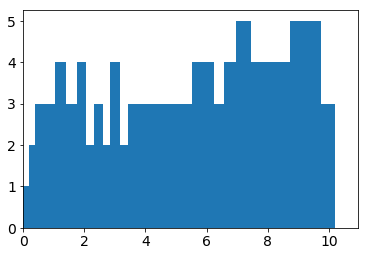

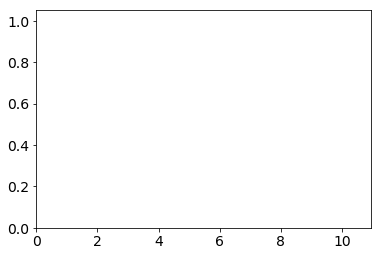

In [20]:
for i in range(len(g[:])):
    hist(x[i, :], g[i, :])
    xlim(0, max(x[i, :] +1))
    show()